In [ ]:
# Q1: What is K-Nearest Neighbors (KNN) and how does it work?
"""
K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression.
It works by finding the K closest training examples in the feature space to a given test point and making predictions 
based on their labels (for classification) or values (for regression).
"""

In [ ]:
# Q2: What is the difference between KNN Classification and KNN Regression?
"""
- KNN Classification: Predicts the class label by majority voting among the K nearest neighbors.
- KNN Regression: Predicts the average (or weighted average) of the target values of the K nearest neighbors.
"""

In [ ]:
# Q3: What is the role of the distance metric in KNN?
"""
The distance metric (e.g., Euclidean, Manhattan) determines how the similarity between data points is calculated.
It directly influences which neighbors are considered 'nearest' to the query point.
"""

In [ ]:
# Q4: What is the Curse of Dimensionality in KNN?
"""
As the number of dimensions increases, data points become increasingly sparse and equidistant from each other.
This reduces the effectiveness of distance-based algorithms like KNN.
"""

In [ ]:
# Q5: How can we choose the best value of K in KNN?
"""
By using techniques like cross-validation and evaluating model performance across different values of K.
The K that gives the best validation accuracy or lowest error is typically chosen.
"""

In [ ]:
# Q6: What are KD Tree and Ball Tree in KNN?
"""
KD Tree and Ball Tree are data structures that speed up nearest neighbor searches by organizing data in a tree structure.
- KD Tree: Best for low-dimensional data.
- Ball Tree: Better for high-dimensional data.
"""

In [ ]:
# Q7: When should you use KD Tree vs. Ball Tree?
"""
- Use KD Tree for low-dimensional datasets (typically < 20).
- Use Ball Tree for high-dimensional datasets.
"""

In [ ]:
# Q8: What are the disadvantages of KNN?
"""
- Computationally expensive at prediction time.
- Sensitive to irrelevant features and feature scaling.
- Struggles with high-dimensional data.
"""


In [ ]:
# Q9: How does feature scaling affect KNN?
"""
Feature scaling is essential for KNN since it uses distance metrics. Without scaling, features with larger ranges dominate.
"""


In [ ]:
# Q10: What is PCA (Principal Component Analysis)?
"""
PCA is a dimensionality reduction technique that transforms features into a set of orthogonal components that capture
maximum variance in the data.
"""

In [ ]:
# Q11: How does PCA work?
"""
- Standardize the data
- Compute the covariance matrix
- Compute eigenvectors and eigenvalues
- Sort and select top components
- Transform data into new subspace
"""

In [ ]:
# Q12: What is the geometric intuition behind PCA?
"""
PCA finds the directions (principal components) in which the data varies the most and projects the data onto those directions.
"""

In [ ]:
# Q13: What is the difference between Feature Selection and Feature Extraction?
"""
- Feature Selection: Selects a subset of original features.
- Feature Extraction: Transforms data into a new feature space (e.g., PCA).
"""

In [ ]:
# Q14: What are Eigenvalues and Eigenvectors in PCA?
"""
Eigenvectors define the direction of new feature space, and eigenvalues represent the magnitude (variance) along those directions.
"""

In [ ]:
# Q15: How do you decide the number of components to keep in PCA?
"""
By looking at the explained variance ratio and using a scree plot or retaining components that explain a certain % (e.g., 95%) of variance.
"""

In [ ]:
# Q16: Can PCA be used for classification?
"""
Yes, PCA can be used as a preprocessing step before classification to reduce dimensionality and noise.
"""

In [ ]:
# Q17: What are the limitations of PCA?
"""
- Assumes linear relationships.
- Can lose interpretability of features.
- Sensitive to data scaling.
"""

In [ ]:
# Q18: How do KNN and PCA complement each other?
"""
PCA reduces dimensionality and noise, making KNN more effective and less sensitive to the curse of dimensionality.
"""

In [ ]:
# Q19: How does KNN handle missing values in a dataset?
"""
KNN does not handle missing values directly. You can use KNN imputation where missing values are filled based on the nearest neighbors.
"""

In [ ]:
# Q20: What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
"""
- PCA is unsupervised; LDA is supervised.
- PCA maximizes variance; LDA maximizes class separability.
"""

In [1]:
# Q21: Train a KNN Classifier on the Iris dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [10]:
# Q22: Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 135.51692298192924


In [12]:
# Q23: Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN with Euclidean distance
model_euclidean = KNeighborsClassifier(metric='euclidean')
model_euclidean.fit(X_train, y_train)

# KNN with Manhattan distance
model_manhattan = KNeighborsClassifier(metric='manhattan')
model_manhattan.fit(X_train, y_train)

# Evaluate and compare
acc_euclidean = accuracy_score(y_test, model_euclidean.predict(X_test))
acc_manhattan = accuracy_score(y_test, model_manhattan.predict(X_test))

print("Euclidean Accuracy:", acc_euclidean)
print("Manhattan Accuracy:", acc_manhattan)

Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


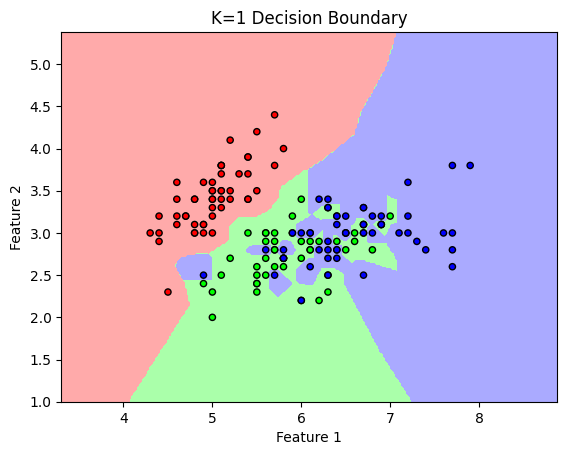

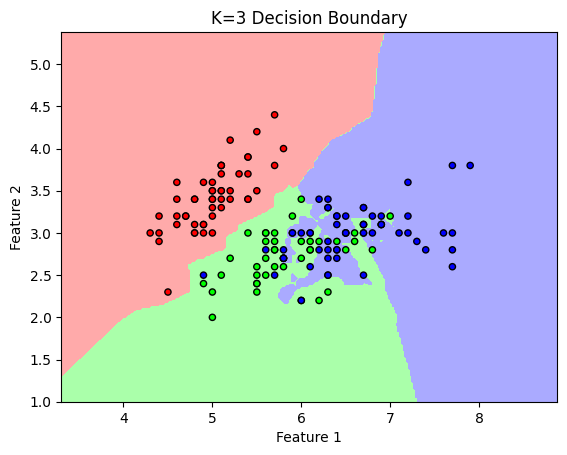

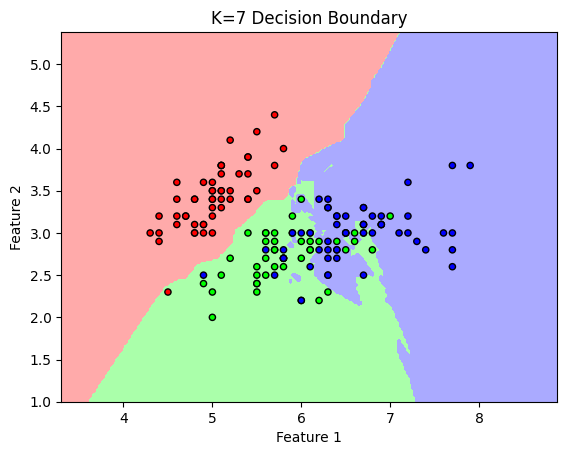

In [13]:
# Q24: Train a KNN Classifier with different values of K and visualize decision boundaries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y):
    X = X[:, :2]  # only first 2 features for plotting
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for k in [1, 3, 7]:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure()
        plt.contourf(xx, yy, Z, cmap=cmap_light)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.title(f"K={k} Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

plot_decision_boundary(iris.data, iris.target)

In [14]:
# Q25: Apply Feature Scaling before training a KNN model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler

# Without scaling
model_unscaled = KNeighborsClassifier()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", acc_unscaled)
print("Accuracy with scaling:", acc_scaled)

Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [16]:
# Q26: Train a PCA model on synthetic data and print the explained variance ratio for each component
from sklearn.decomposition import PCA

X_syn, _ = make_regression(n_samples=100, n_features=5, noise=5, random_state=42)
X_syn_scaled = StandardScaler().fit_transform(X_syn)

pca_syn = PCA()
pca_syn.fit(X_syn_scaled)

print("Explained Variance Ratio (Synthetic Data):", pca_syn.explained_variance_ratio_)

Explained Variance Ratio (Synthetic Data): [0.25707979 0.21272367 0.19548324 0.18457537 0.15013794]


In [17]:
# Q27: Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc_without_pca = accuracy_score(y_test, knn.predict(X_test))

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
acc_with_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("Accuracy without PCA:", acc_without_pca)
print("Accuracy with PCA:", acc_with_pca)

Accuracy without PCA: 1.0
Accuracy with PCA: 1.0


In [18]:
# Q28: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)
print("Test Set Accuracy:", accuracy_score(y_test, grid.predict(X_test)))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Score: 0.9523809523809523
Test Set Accuracy: 1.0


In [19]:
# Q29: Train a KNN Classifier and check the number of misclassified samples

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

misclassified = (y_test != y_pred).sum()
print("Number of Misclassified Samples:", misclassified)


Number of Misclassified Samples: 0


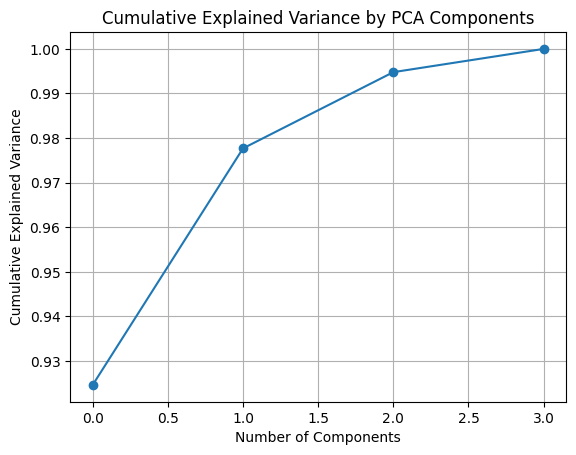

In [20]:
# Q30: Train a PCA model and visualize the cumulative explained variance.

pca = PCA().fit(X)  # X can be your dataset, e.g., iris.data or any other
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [21]:
# Q31: Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

model_uniform = KNeighborsClassifier(weights='uniform')
model_distance = KNeighborsClassifier(weights='distance')

model_uniform.fit(X_train, y_train)
model_distance.fit(X_train, y_train)

acc_uniform = accuracy_score(y_test, model_uniform.predict(X_test))
acc_distance = accuracy_score(y_test, model_distance.predict(X_test))

print("Accuracy with uniform weights:", acc_uniform)
print("Accuracy with distance weights:", acc_distance)


Accuracy with uniform weights: 1.0
Accuracy with distance weights: 1.0


In [22]:
# Q32: Train a KNN Regressor and analyze the effect of different K values on performance

for k in [1, 3, 5, 7, 9]:
    reg_k = KNeighborsRegressor(n_neighbors=k)
    reg_k.fit(X_train, y_train)
    y_pred_k = reg_k.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_k)
    print(f"K={k}, MSE={mse}")


K=1, MSE=0.0
K=3, MSE=0.007407407407407404
K=5, MSE=0.011555555555555552
K=7, MSE=0.012244897959183678
K=9, MSE=0.010425240054869686


In [23]:
# Q33: Implement KNN Imputation for handling missing values in a dataset

from sklearn.impute import KNNImputer
import numpy as np

# Creating a sample dataset with missing values
X_missing = np.array([[1, 2, np.nan],
                      [3, np.nan, 1],
                      [5, 6, 2],
                      [np.nan, 4, 3]])

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X_missing)

print("After KNN Imputation:\n", X_imputed)


After KNN Imputation:
 [[1. 2. 2.]
 [3. 4. 1.]
 [5. 6. 2.]
 [4. 4. 3.]]


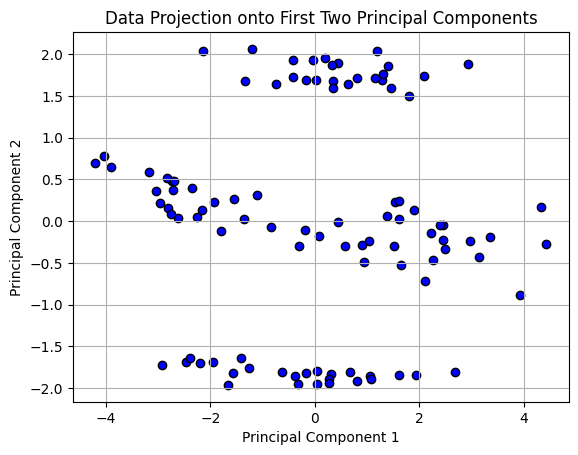

In [25]:
# Q34: Train a PCA model and visualize the data projection onto the first two principal components
from sklearn.datasets import make_classification

X, _ = make_classification(n_samples=100, n_features=5, random_state=42)
X_pca = PCA(n_components=2).fit_transform(X)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projection onto First Two Principal Components')
plt.grid(True)
plt.show()


In [26]:
# Q35: Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
acc_kd = accuracy_score(y_test, knn_kd.predict(X_test))

knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
acc_ball = accuracy_score(y_test, knn_ball.predict(X_test))

print("KD Tree Accuracy:", acc_kd)
print("Ball Tree Accuracy:", acc_ball)

KD Tree Accuracy: 1.0
Ball Tree Accuracy: 1.0


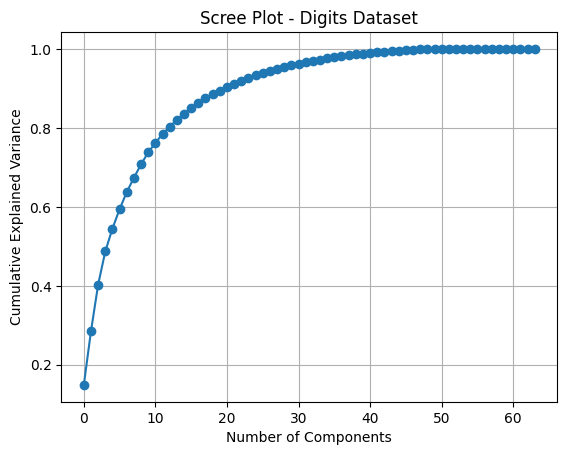

In [27]:
# Q36: Train a PCA model on a high-dimensional dataset and visualize the Scree plot

from sklearn.datasets import load_digits

digits = load_digits()
pca_digits = PCA().fit(digits.data)
explained_variance = pca_digits.explained_variance_ratio_

plt.figure()
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Digits Dataset')
plt.grid(True)
plt.show()

In [28]:
# Q37: Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.metrics import classification_report

model_knn_eval = KNeighborsClassifier(n_neighbors=3)
model_knn_eval.fit(X_train, y_train)
y_pred_eval = model_knn_eval.predict(X_test)

print(classification_report(y_test, y_pred_eval, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [29]:
# Q38: Train a PCA model and analyze the effect of different numbers of components on accuracy

accuracies = []
components_range = range(1, 5)

for n in components_range:
    X_pca_n = PCA(n_components=n).fit_transform(iris.data)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_n, iris.target, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train_pca)
    y_pred_pca = knn.predict(X_test_pca)
    acc = accuracy_score(y_test_pca, y_pred_pca)
    accuracies.append(acc)
    print(f"Components: {n}, Accuracy: {acc:.4f}")

Components: 1, Accuracy: 0.9778
Components: 2, Accuracy: 1.0000
Components: 3, Accuracy: 1.0000
Components: 4, Accuracy: 1.0000


In [30]:
# Q39: Train a KNN Classifier with different leaf_size values and compare accuracy

leaf_sizes = [10, 20, 30, 40, 50]
for leaf in leaf_sizes:
    knn = KNeighborsClassifier(leaf_size=leaf)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Leaf Size: {leaf}, Accuracy: {acc:.4f}")

Leaf Size: 10, Accuracy: 1.0000
Leaf Size: 20, Accuracy: 1.0000
Leaf Size: 30, Accuracy: 1.0000
Leaf Size: 40, Accuracy: 1.0000
Leaf Size: 50, Accuracy: 1.0000


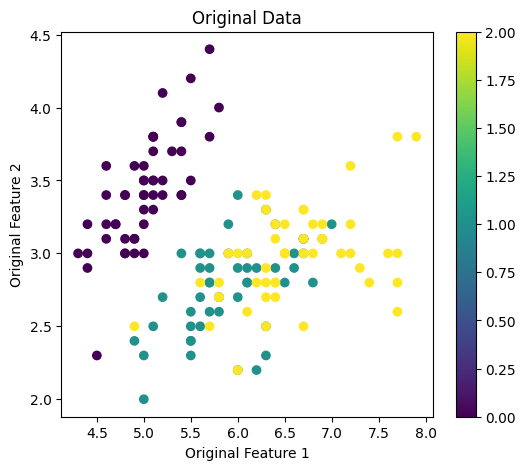

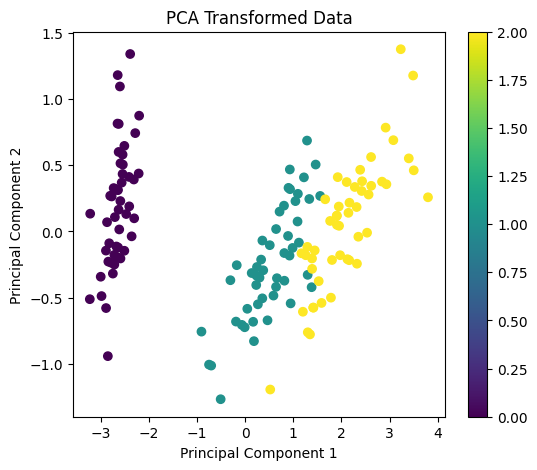

In [31]:
# Q40: Train a PCA model and visualize how data points are transformed before and after PCA

# Original data visualization (first two features)
plt.figure(figsize=(6, 5))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("Original Data")
plt.colorbar()
plt.show()

# PCA-transformed data visualization (first two components)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(iris.data)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar()
plt.show()

In [32]:
# Q41: Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

knn_wine = KNeighborsClassifier()
knn_wine.fit(X_train_w, y_train_w)
y_pred_w = knn_wine.predict(X_test_w)

print("Classification Report:\n", classification_report(y_test_w, y_pred_w))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [33]:
# Q42: Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

for metric in ['euclidean', 'manhattan', 'chebyshev']:
    knn_reg = KNeighborsRegressor(metric=metric)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE with {metric} distance: {mse:.2f}")

MSE with euclidean distance: 0.01
MSE with manhattan distance: 0.01
MSE with chebyshev distance: 0.02


In [37]:
# Q43: Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.metrics import roc_auc_score

# Generate binary classification data
X_cls, y_cls = make_classification(n_samples=500, n_classes=2, n_features=5, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_cls = scaler.fit_transform(X_train_cls)
X_test_cls = scaler.transform(X_test_cls)

# Train KNN Classifier
knn_roc = KNeighborsClassifier()
knn_roc.fit(X_train_cls, y_train_cls)

# Predict probabilities
y_proba = knn_roc.predict_proba(X_test_cls)[:, 1]

# Evaluate using ROC-AUC score
roc_auc = roc_auc_score(y_test_cls, y_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9536


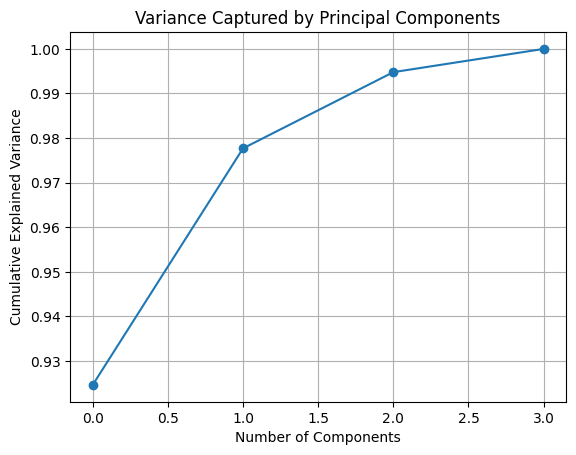

In [38]:
# Q44: Train a PCA model and visualize the variance captured by each principal component

pca_44 = PCA()
pca_44.fit(iris.data)

plt.figure()
plt.plot(np.cumsum(pca_44.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Captured by Principal Components')
plt.grid(True)
plt.show()


In [39]:
# Q45: Train a KNN Classifier and perform feature selection before training

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(iris.data, iris.target)

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, iris.target, test_size=0.3, random_state=42)
knn_fs = KNeighborsClassifier()
knn_fs.fit(X_train_sel, y_train_sel)
y_pred_sel = knn_fs.predict(X_test_sel)
print("Accuracy after Feature Selection:", accuracy_score(y_test_sel, y_pred_sel))


Accuracy after Feature Selection: 1.0


In [40]:
# Q46: Train a PCA model and visualize the data reconstruction error after reducing dimensions

pca_2 = PCA(n_components=2)
X_reduced = pca_2.fit_transform(iris.data)
X_reconstructed = pca_2.inverse_transform(X_reduced)

reconstruction_error = np.mean((iris.data - X_reconstructed) ** 2)
print("Reconstruction Error with 2 Components:", reconstruction_error)


Reconstruction Error with 2 Components: 0.025341073932398255


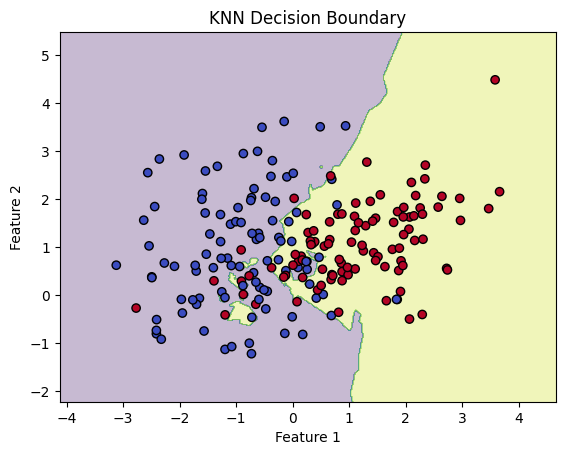

In [41]:
# Q47: Train a KNN Classifier and visualize the decision boundary

from sklearn.datasets import make_classification

X_vis, y_vis = make_classification(n_samples=200, n_features=2, n_informative=2, 
                                   n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap='coolwarm')
plt.title("KNN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


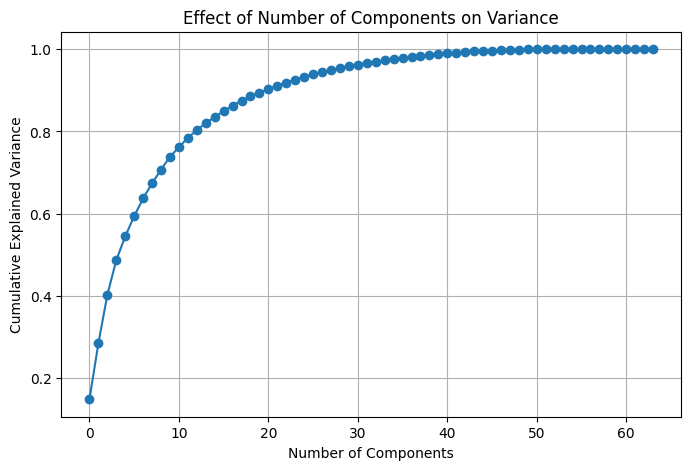

In [42]:
# Q48: Train a PCA model and analyze the effect of different numbers of components on data variance

from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits.data

# Fit PCA
pca = PCA().fit(X_digits)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Effect of Number of Components on Variance')
plt.grid(True)
plt.show()
